# Problem Statement
### Given a Bank customer Details, can we build a classifier which can determine whether they will leave Bank Services in the next 6 months or not?

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
# dropping the unnecesary column
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace= True)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# for analysis we import pandas profilling
from pandas_profiling import ProfileReport
report = ProfileReport(df)
# report.to_notebook_iframe()

C:\Users\prvnb\AppData\Local\Temp\ipykernel_1332\3839161197.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


- There are total 11 Number of Feature available (Columns) in dataset
- There are 10000 Number of observations (Rows) available in dataset
- No Missing cells available in dataset
- No Duplicate rows	present in the dataset
- Total Five Numeric feature column present in the dataset
- Total Six Categorical feature columns Present in the dataset	

# Domain Analysis


- The geography of a person can determine whether they will leave a bank in the next 6 months or not in a few ways.

    - Economic factors: The economic conditions of a region can influence customer churn. For example, if a region is experiencing high unemployment, customers may be more likely to switch banks in order to save money.
    - Competition: The level of competition in a region can also influence customer churn. If there are a lot of banks competing for customers in a region, customers may be more likely to switch banks if they are not satisfied with their current bank.
    - Regulations: The regulations in a region can also influence customer churn. For example, if a region has strict regulations on banks, customers may be more likely to switch banks if they feel that their bank is not meeting their needs.
    - Culture: The culture of a region can also influence customer churn. For example, in some cultures, it is more common for people to switch banks than in others.
------------------------------

- Here are some of the factors that may influence the relationship between gender and churn rates:

    - The type of bank service. For example, women may be more likely to leave a bank if they are dissatisfied with their checking account than if they are dissatisfied with their savings account.
    - The customer's needs. For example, women who are primary breadwinners may be more likely to leave a bank if they are not satisfied with the bank's lending products.
    - The bank's marketing and customer service strategies. For example, banks that target women with their marketing messages may be less likely to experience churn from female customers.
---------------------------------

- Age can be a factor in determining whether a person will leave bank services in the next 6 months. Here are some reasons why:

    - Lifestyle changes. As people age, their lifestyle may change. They may retire, move to a different location, or start a new business. These changes can lead to a need for different banking services. For example, a retired person may no longer need a checking account with overdraft protection, while a business owner may need a line of credit.
    - Financial needs. People's financial needs may change as they age. They may need more or less money for retirement, or they may need to access their money more often. These changes can lead to a need for different banking products and services.
    - Technology preferences. People's technology preferences may change as they age. They may become more comfortable with online banking, or they may prefer to do their banking in person. These changes can lead to a change in the bank that they use.
----------------------------

- Tenure of a person can be a factor in determining whether they will leave bank services in the next 6 months or not. Here are some reasons why:

    - Customers with shorter tenures are more likely to be dissatisfied with their bank. This is because they have less time to build relationships with bank employees and to learn about the bank's products and services. As a result, they are more likely to be unhappy with the bank's customer service, fees, or interest rates.
    - Customers with shorter tenures are more likely to be attracted to new offers from other banks. This is because they are more likely to be aware of new products and services that are available, and they are more likely to be willing to switch banks in order to get a better deal.
    - Customers with shorter tenures are more likely to be influenced by their friends and family. If their friends or family members have had a negative experience with a particular bank, they are more likely to be hesitant to do business with that bank themselves.
---------------------------------

- The balance of a person's bank account can be a determining factor in whether they will leave their bank services in the next 6 months or not. Here are some reasons why:

    - Low balance: If a person's bank balance is consistently low, they may be more likely to switch banks in search of a better deal. This is because they may be paying high fees for their account, or they may not be getting the features and services they need.
    - High balance: On the other hand, if a person's bank balance is consistently high, they may be less likely to switch banks. This is because they may be happy with the level of service they are receiving, and they may not want to go through the hassle of switching banks.
    - Change in financial circumstances: If a person's financial circumstances change, such as if they lose their job or their income decreases, they may be more likely to switch banks. This is because they may need to find a bank that offers lower fees or more financial products to help them manage their money.
    - Poor customer service: If a person has had a bad experience with their bank's customer service, they may be more likely to switch banks. This is because they may not feel like they are getting the support they need from their bank, and they may be looking for a bank that offers better customer service.
--------------------------------

- The number of products taken by a person can be a predictor of whether they will leave bank services in the next 6 months. This is because people who are more invested in a bank's products are less likely to switch to a different bank. For example, someone who has a checking account, savings account, credit card, and mortgage with a bank is more likely to stay with that bank than someone who only has a checking account.

- There are a few reasons why this is the case. First, people who are more invested in a bank's products are more likely to be happy with the bank's services. They are more likely to have had positive experiences with the bank, and they are less likely to have had any problems with the bank's products or services.

- Second, people who are more invested in a bank's products are more likely to have a sunk cost. This means that they have already invested a lot of time, money, or effort into the bank's products, and they are less likely to want to give up on that investment.

- Finally, people who are more invested in a bank's products are more likely to be locked in. This means that they may have signed up for a long-term contract with the bank, or they may have difficulty transferring their products to another bank.
-----------------------------------

- There are a few factors that can indicate whether a person is likely to leave bank services in the next 6 months, and the type of credit card they have taken can be one of them. Here are some of the ways in which a credit card can be used to determine this:

    - The type of credit card: Some credit cards, such as those that offer rewards or travel benefits, can be a sign that the customer is satisfied with their bank's services. However, other types of credit cards, such as those with high interest rates or annual fees, can be a sign that the customer is unhappy with their bank and is looking for a better deal.
    - The amount of credit used: If a customer is using a large amount of their credit limit, it can be a sign that they are struggling to pay their bills and may be considering switching banks. However, if a customer is only using a small amount of their credit limit, it can be a sign that they are happy with their bank and are not planning to leave.
    - The payment history: If a customer has a history of making late payments or carrying a balance on their credit card, it can be a sign that they are unhappy with their bank and are considering switching. However, if a customer has a good payment history, it can be a sign that they are satisfied with their bank and are not planning to leave.
---------------------------------

- Whether a person is an active member of a bank can be a determining factor in whether they will leave bank services in the next 6 months. Here are some reasons why:

    - Active members are more likely to be satisfied with their jobs. They are more likely to have a strong sense of belonging and community, and they are more likely to feel like they are making a difference. This can lead to them being less likely to leave their jobs, even if they are offered a better opportunity elsewhere.
    - Active members are more likely to have a strong network of colleagues. This network can provide them with support and advice if they are considering leaving their job. They are also more likely to hear about new opportunities through their network, which can make it easier for them to find a new job if they do decide to leave.
    - Active members are more likely to be aware of the benefits of staying with the bank. They may be aware of things like pension plans, health insurance, and other benefits that they would lose if they left. This can make them more likely to stay with the bank, even if they are unhappy with their job.
----------------------------------

- Salary can be a factor in whether someone closes their bank account in the next 6 months. Here are some reasons why:

    - If the person changes jobs, they may no longer receive their salary in the same bank account. This could lead them to close the account if they don't have any other reason to keep it open.
    - If the person's salary increases, they may switch to a different bank that offers better benefits or features. For example, they may want a bank with a higher interest rate on savings accounts or a wider range of ATMs.
    - If the person's salary decreases, they may need to close an account to save money. This is especially likely if they have other debts or expenses that they need to prioritize.

# Exploratory Data Analysis

## Univariate Analysis

In [6]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
cont_col = [col for col in df if (df[col].dtypes == 'int64') or (df[col].dtypes == 'float64')]
cat_col = [col for col in df if df[col].dtypes == 'object']

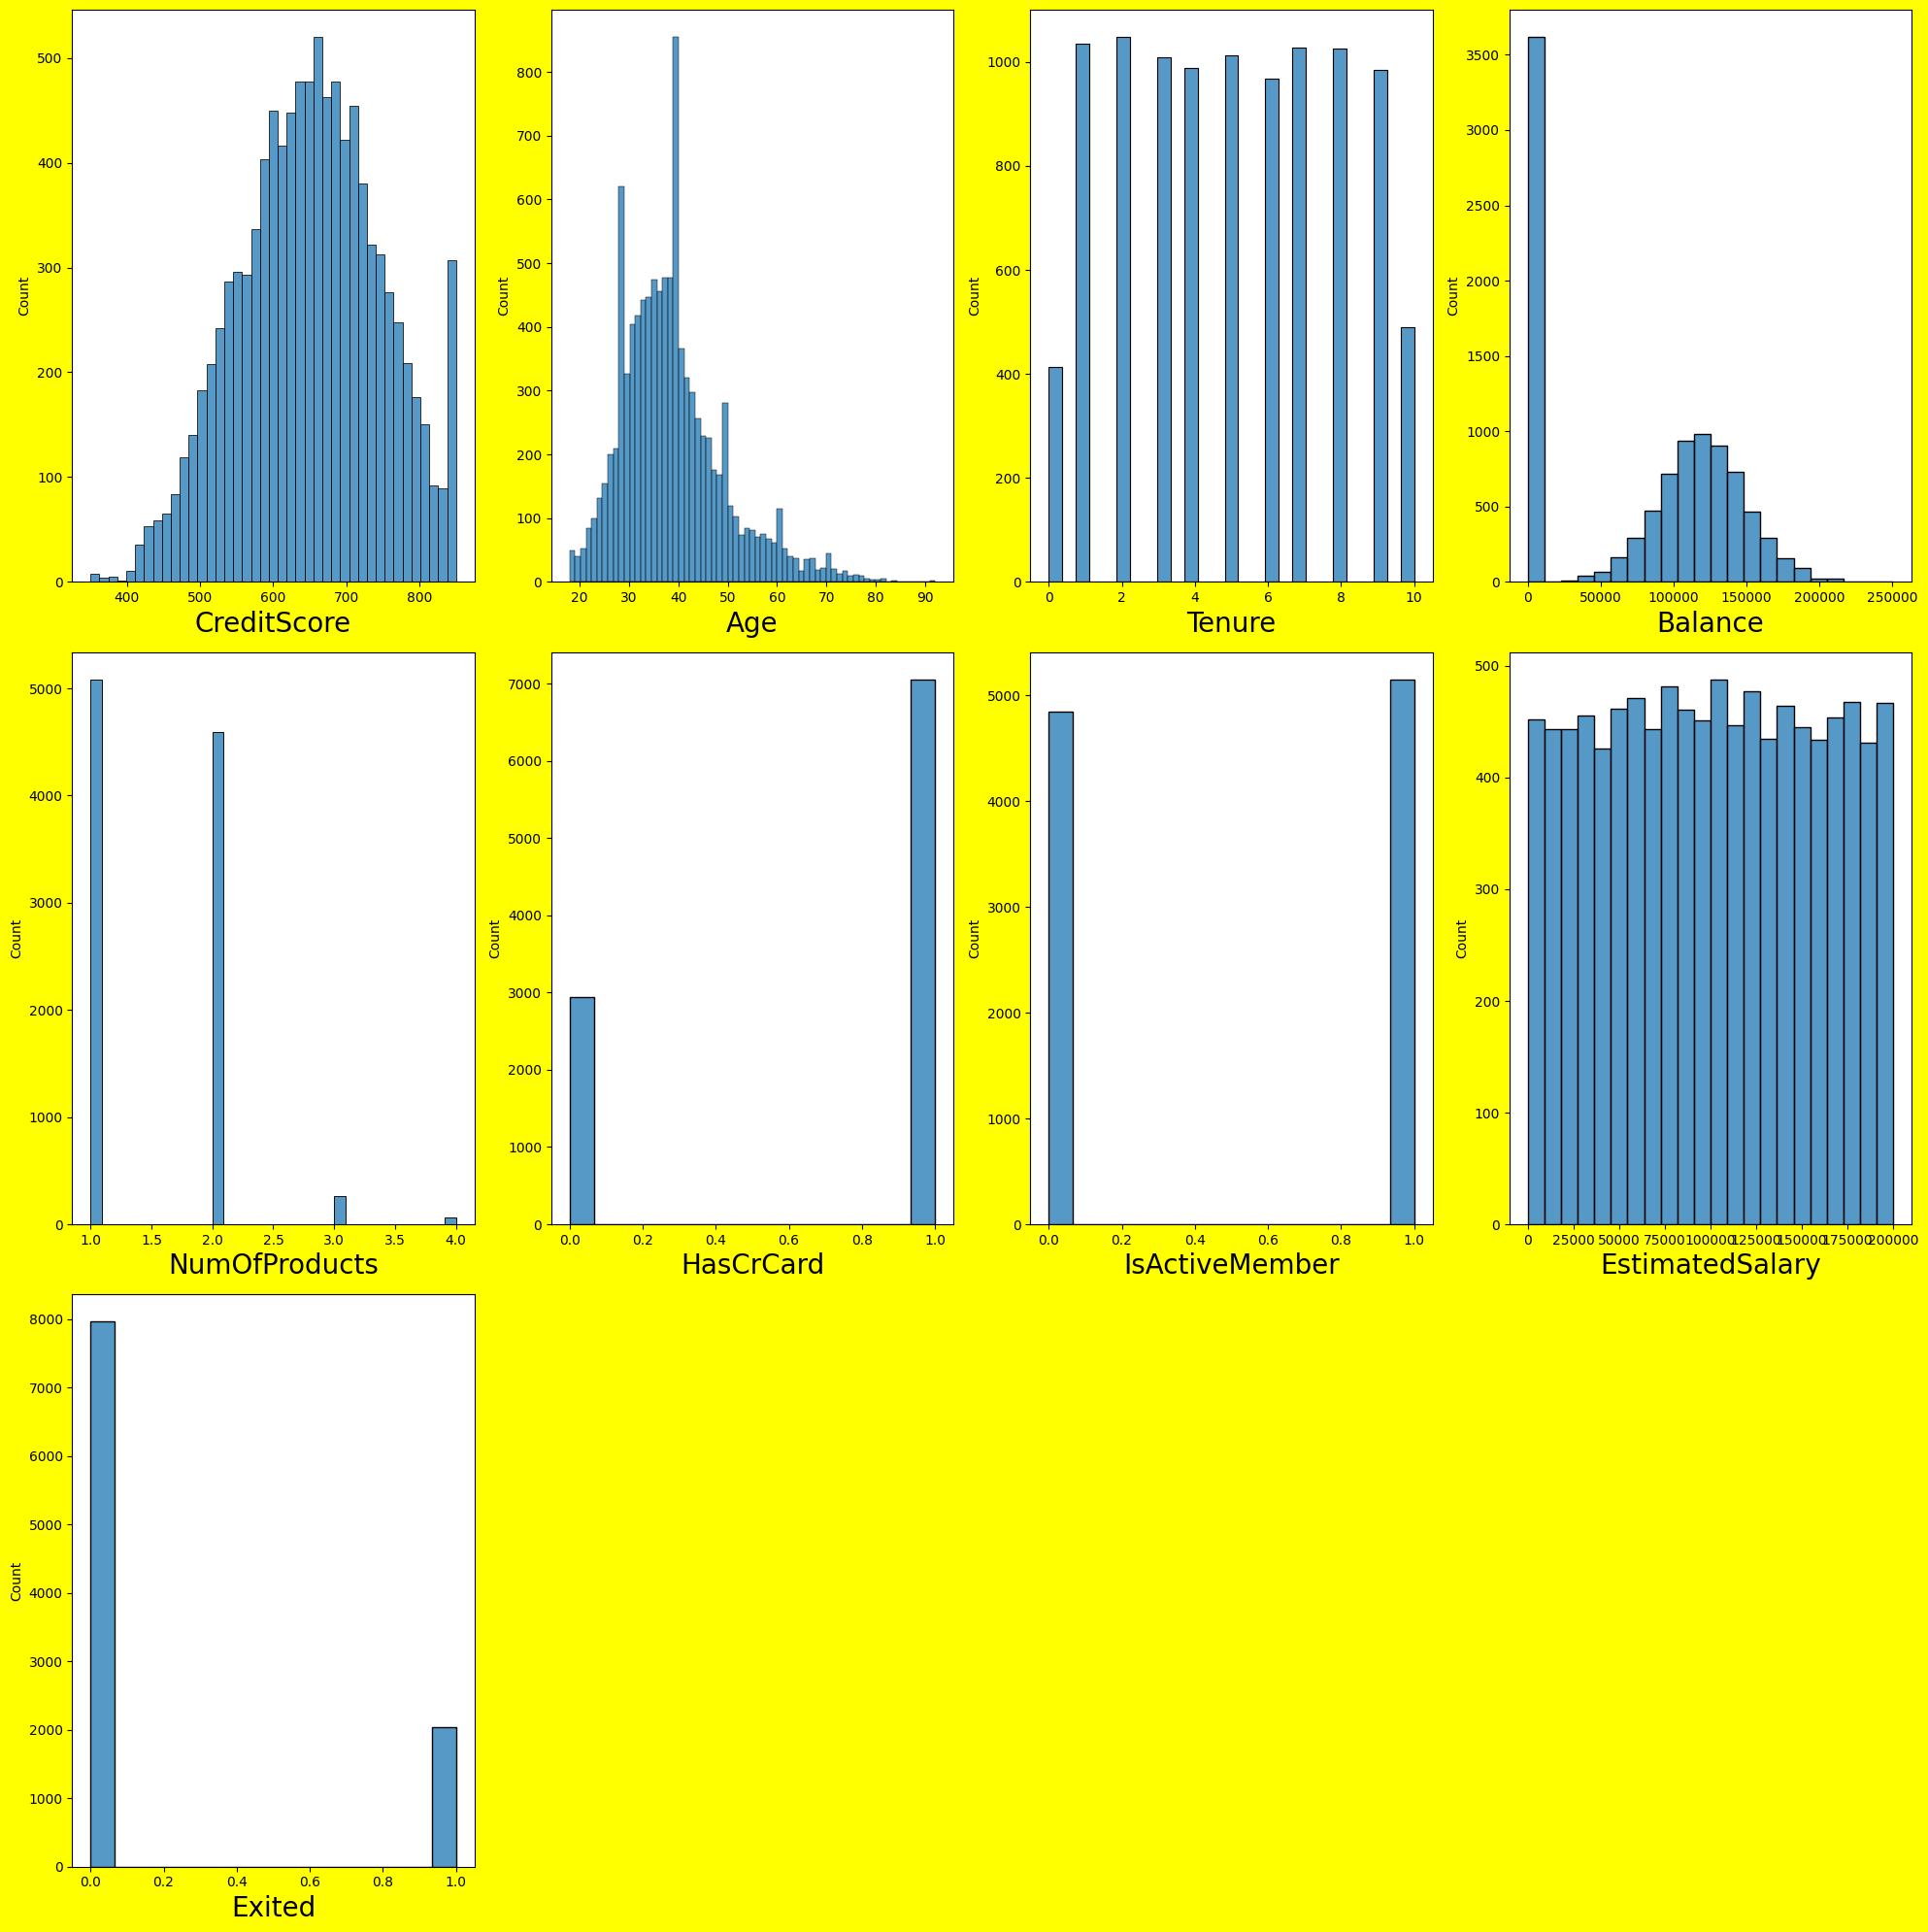

In [9]:
plt.figure(figsize=(20,20), facecolor='yellow')
plotnumber = 1
for col in cont_col:
    if plotnumber >=1:
        plt.subplot(3,4, plotnumber)
        sns.histplot(df[col])
        plt.xlabel(col, fontsize=20)
    plotnumber+=1
plt.tight_layout()
    

- Total 233 out of 10000 people which have credit score equals to 850 which is 2.3% of the total dataset. So the 850 is Highest credit score which means either the person is not done any transaction till date or it may Showing the corrupted values. so We have to impute this value with meadian value
- The credit Score column shows the some what gaussian distribution 
- The mininimum credit score is 350 and the maximum score is 850
- The maximum people have credit score equal to 650
----------------------

- In age columns shows some what gaussian distribution 
- The distribution is likely to skewed toward right
- the average of the people is 40 in the dataset
--------------------
- The people which have less tenure and highest tenure have less in count
- People which likely to taken services more than 2 Year have to more count
---------------------

- People taken only one or two Services of bank is higher in count
---------------------

- People having the credit card is highest in number 
---------------------

- There are lot more people which does'nt left the bank as comapred to who leave the bank
------------------------

- Balance column show some what Gaussian Distribution
- Many People have zero balance in their account
-------------------------

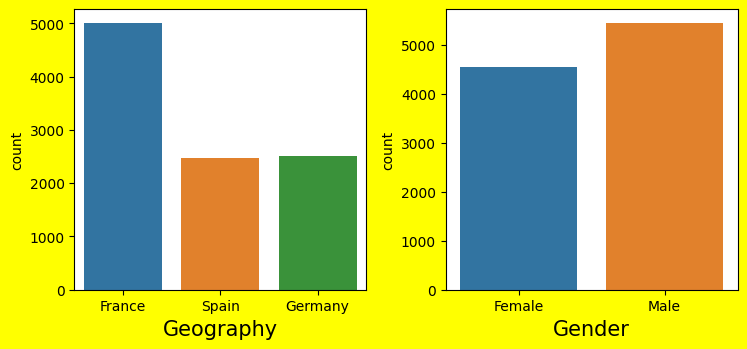

In [10]:
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber = 1
for col in cat_col:
    if plotnumber >=1:
        plt.subplot(3,4, plotnumber)
        sns.countplot(data=df, x=df[col])
        plt.xlabel(col, fontsize=15)
    plotnumber+=1
plt.tight_layout()
    

- The people from the france is more comapared to other countries
- Male customer are more that Female customer

## Bivariate Analysis

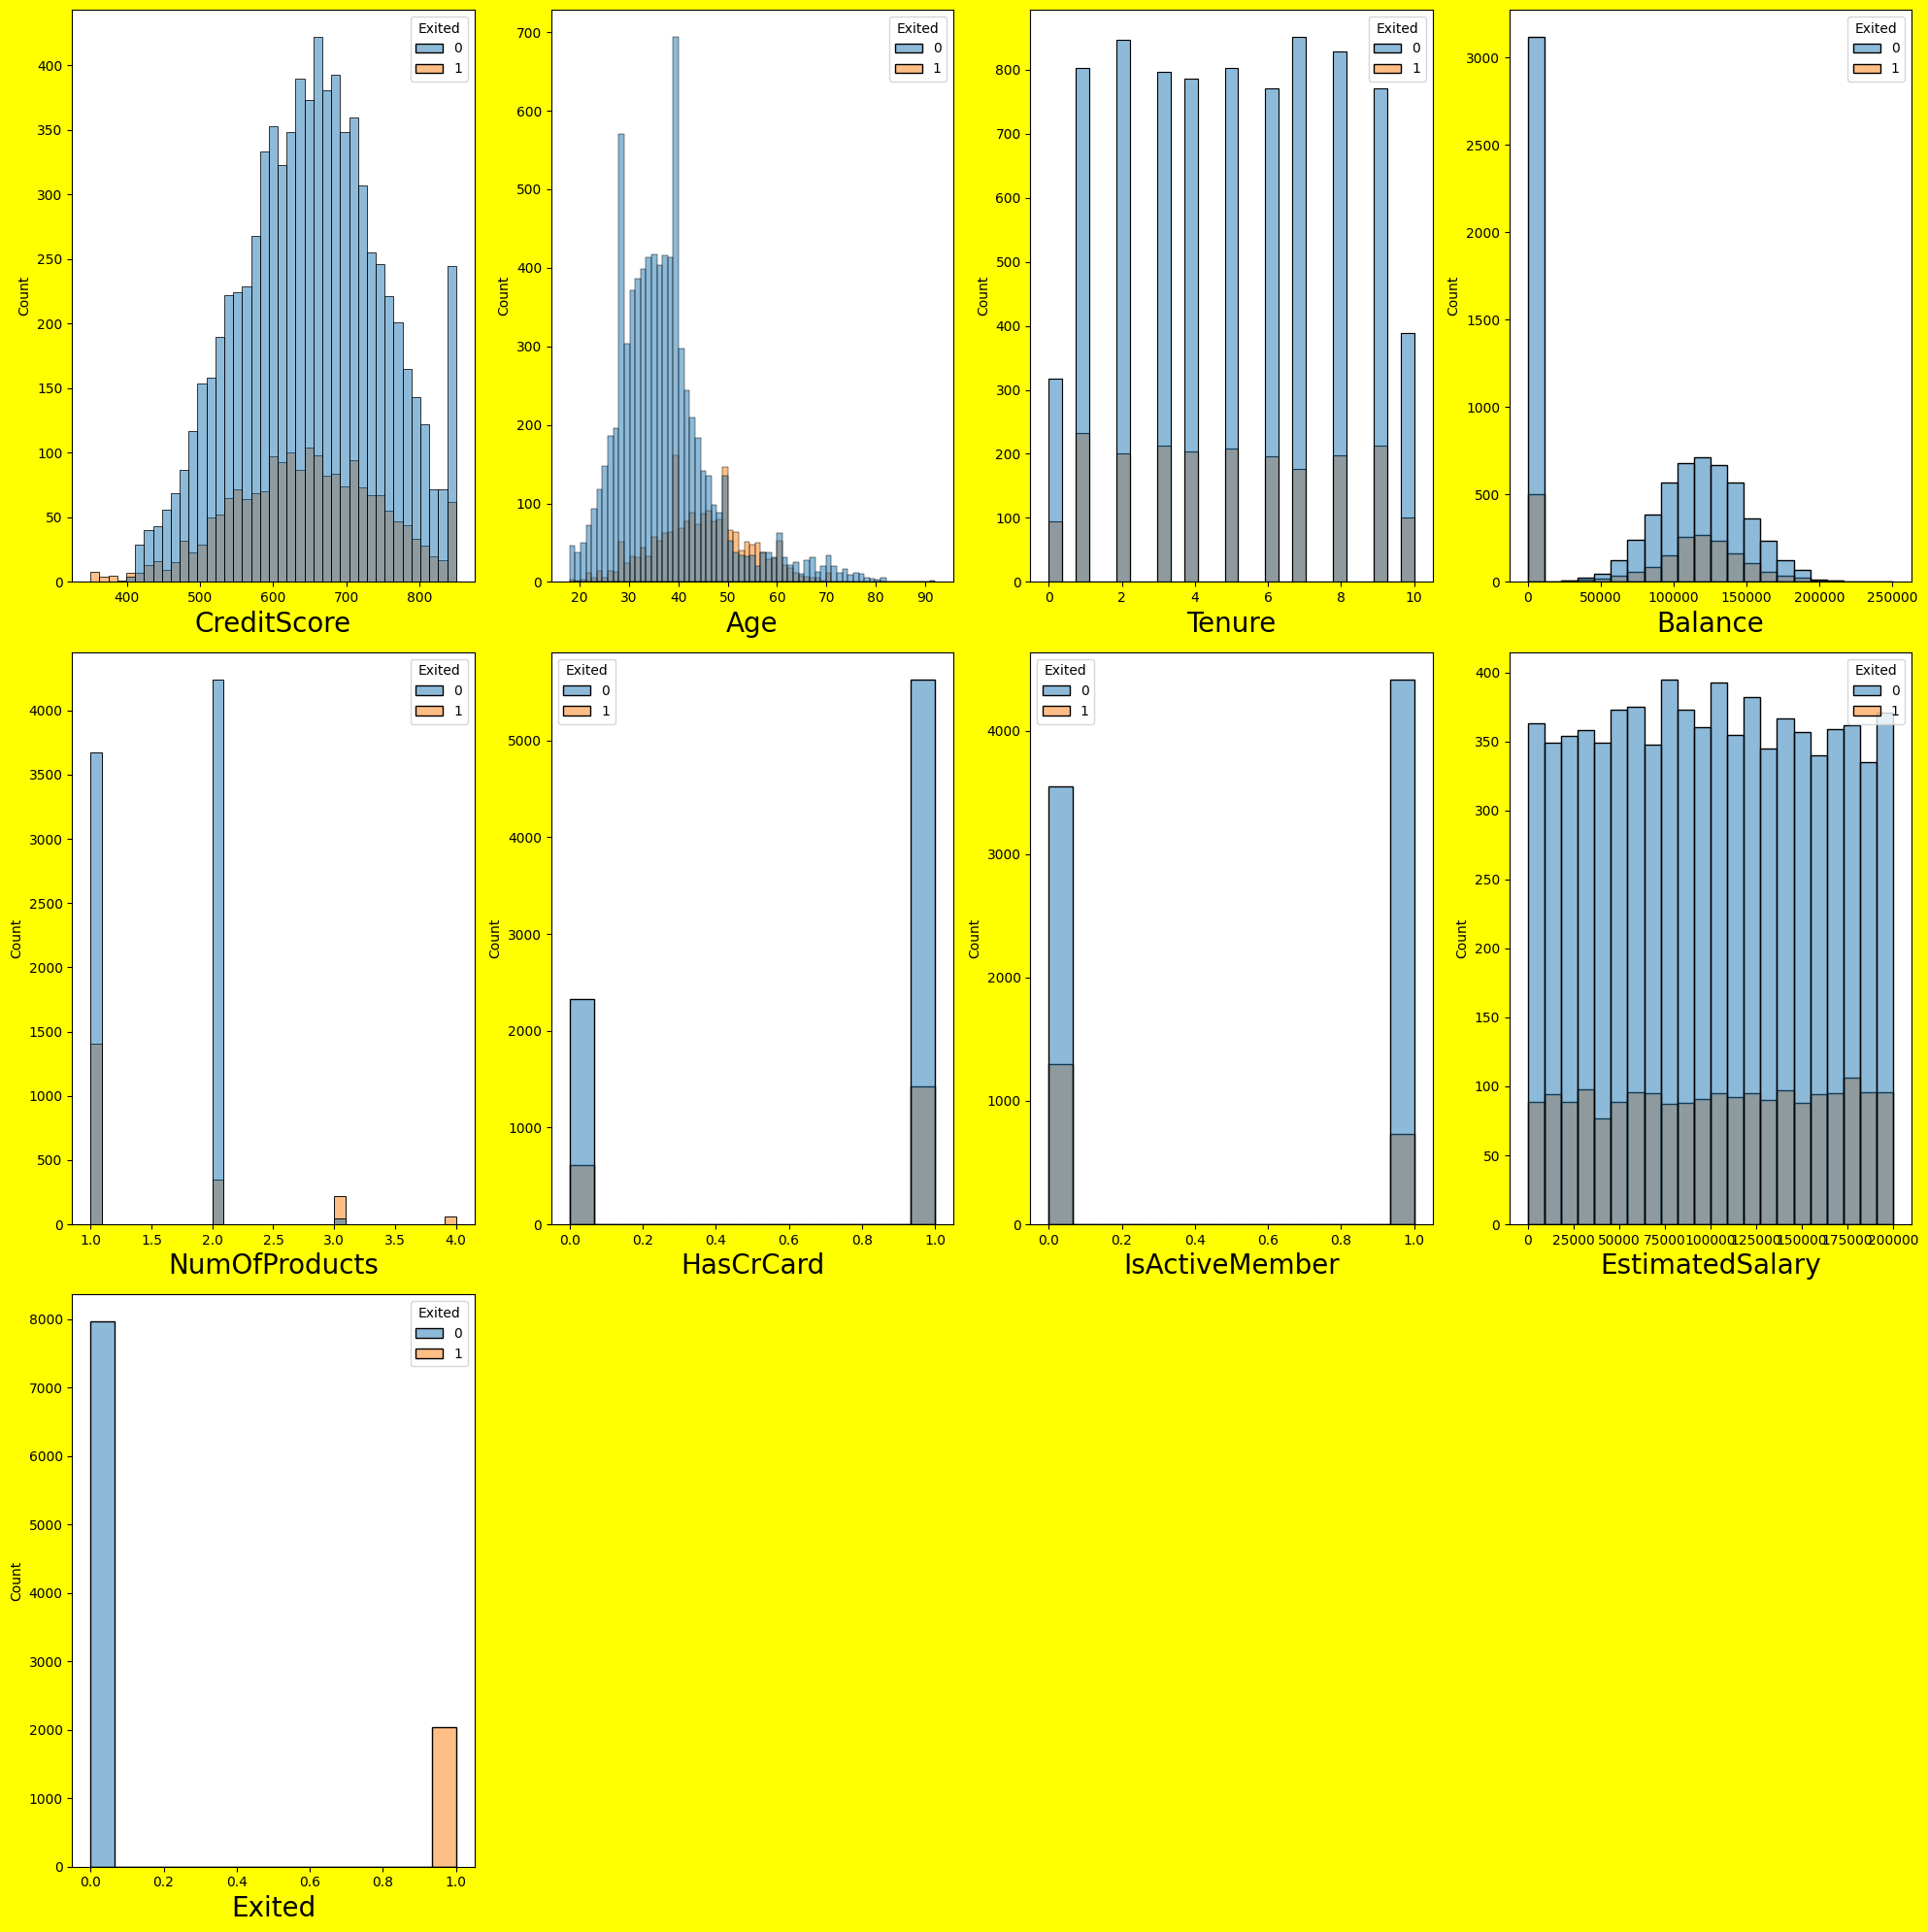

In [11]:
plt.figure(figsize=(20,20), facecolor='yellow')
plotnumber = 1
for col in cont_col:
    if plotnumber >=1:
        ax = plt.subplot(3,4, plotnumber)
        sns.histplot(data= df, x=df[col], hue=df['Exited'])
        plt.xlabel(col, fontsize=20)
    plotnumber+=1
plt.tight_layout()
    

- people having credit score less than 400 is likely leave the bank more
- people having age between 50-60 likely to leave the bank 
- People taken more than two product are likely to leave the bank
- People which are Not Active menber is likely to leave the bank

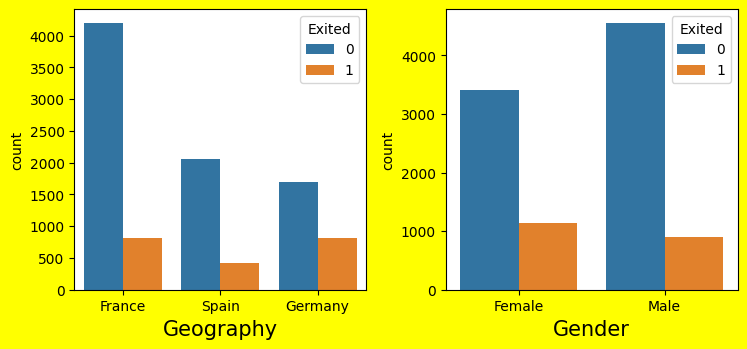

In [12]:
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber = 1
for col in cat_col:
    if plotnumber >=1:
        plt.subplot(3,4, plotnumber)
        sns.countplot(data=df, x=df[col], hue= 'Exited')
        plt.xlabel(col, fontsize=15)
    plotnumber+=1
plt.tight_layout()

- People from the germany is likely to leave the bank most
- Female population is likely to leave the company most

## Data Preprocessing

In [13]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
# We have to Impute numerical value to the categorical columns 
df.Gender = df.Gender.map({'Female':0, 'Male':1})

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df.Geography = df.Geography.map({'France':2, 'Spain':1,  'Germany':0})

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,2,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,2,0,42,8,159660.80,3,1,0,113931.57,1
3,699,2,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


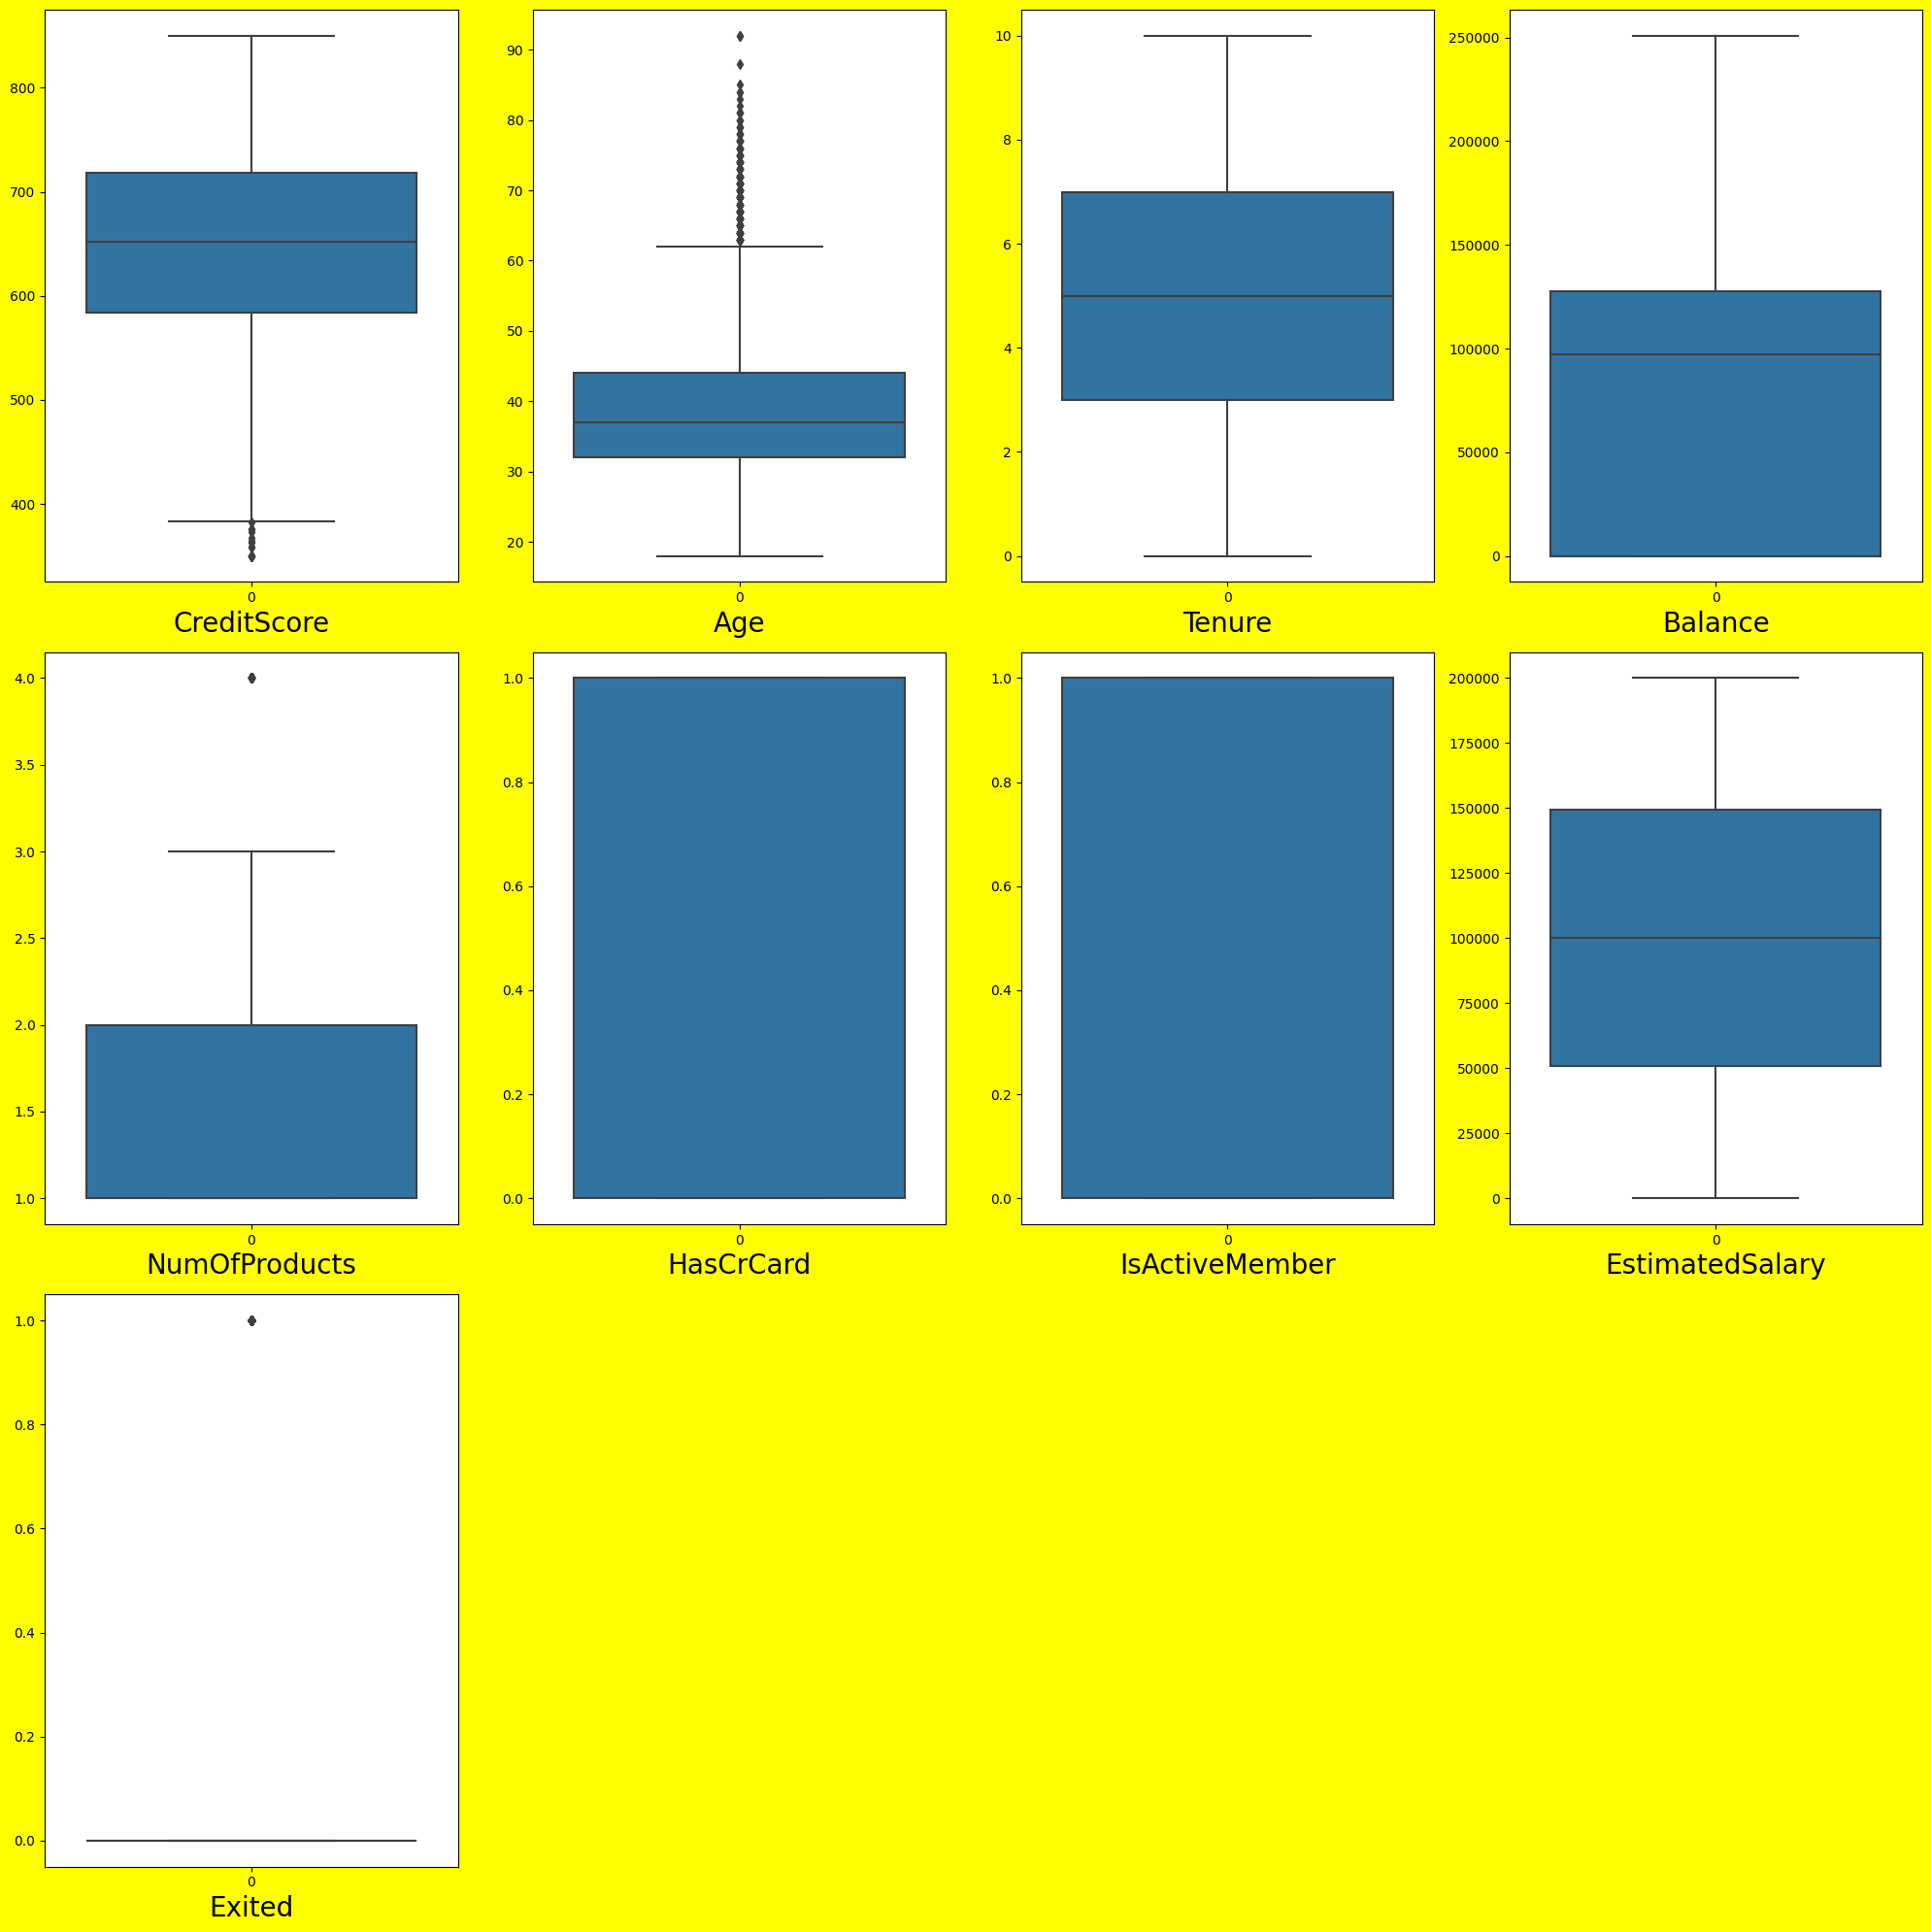

In [18]:
# Check for the outliers
plt.figure(figsize=(20,20), facecolor='yellow')
plotnumber = 1
for col in cont_col:
    if plotnumber >=1:
        ax = plt.subplot(3,4, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=20)
    plotnumber+=1
plt.tight_layout()

- so in our dataset no column have outlier is present

In [19]:
# we have imbalanced column in the dataset so we have to synthetical produce data for analysis
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# Model Creation

In [20]:
# splitting the columns into Independent and dependent varibale
X = df.iloc[:,:-1]
y = df.Exited

In [21]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [23]:
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [24]:
from collections import Counter 
print("Actual Classes", Counter(y_train))
print("SMOTE Classes", Counter(y_smote))

Actual Classes Counter({0: 6382, 1: 1618})
SMOTE Classes Counter({1: 6382, 0: 6382})


### Build a model (ANN) in tensorflow/keras

In [25]:
X_smote.shape

(12764, 10)

In [26]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 4s 3ms/step - loss: 96.1394 - accuracy: 0.6970
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 12.4702 - accuracy: 0.7424
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 13.7374 - accuracy: 0.7508
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 11.0801 - accuracy: 0.7529
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 6.4897 - accuracy: 0.7580
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 6.3830 - accuracy: 0.7558
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 6.6892 - accuracy: 0.7604
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 8.7692 - accuracy: 0.7576
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 8.6961 - accuracy: 0.7595
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 5.7606 - ac

In [27]:
model.evaluate(X_train, y_train)

250/250 [==============================] - 1s 2ms/step - loss: 0.5033 - accuracy: 0.7977


[0.5033097267150879, 0.7977499961853027]

In [28]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 3ms/step


array([[0.20185201],
       [0.20185201],
       [0.20185201],
       [0.20185201],
       [0.20185201]], dtype=float32)

In [30]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [31]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1581
           1       0.00      0.00      0.00       419

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.62      0.79      0.70      2000



C:\Users\prvnb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prvnb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prvnb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_smote, predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

InvalidArgumentError: {{function_node __wrapped__Pack_N_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Shapes of all inputs must match: values[0].shape = [12764] != values[1].shape = [2000] [Op:Pack] name: stack

### Accuracy

In [ ]:
round((1578+1)/(1578+3+148+1),2)

### Precision for 1 class. i.e. Precision for customers who actually churned

In [ ]:
round(1578/(1578+418),2)

0.79

#### Precision for 1 class. i.e. Precision for customers who actually churned

In [53]:
round(1/(1+418),2)

0.0

#### Recall for 0 class

In [54]:
round(1578/(1578+3),2)

1.0